(lucas_asset_pricing_dles)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

```{index} single: python
```

# Lucas Asset Pricing Using DLE

```{contents} Contents
:depth: 2
```

This is one of a suite of lectures that use the quantecon DLE class to instantiate models within the
{cite}`HS2013` class of models described in detail in {doc}`Recursive Models of Dynamic Linear Economies <hs_recursive_models>`.

In addition to what's in Anaconda, this lecture uses the quantecon library

In [1]:
!pip install --upgrade quantecon

This lecture uses  the DLE class to price payout
streams that are linear functions of the economy's state vector, as well
as risk-free assets that pay out one unit of the first consumption good
with certainty.

We assume basic knowledge of the class of economic environments that fall within the domain of the
DLE class.

Many details about the basic environment are contained in the lecture
{doc}`Growth in Dynamic Linear Economies <growth_in_dles>`.

We'll also need the following imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from quantecon import DLE
%matplotlib inline

We use a linear-quadratic version of an economy that Lucas (1978) {cite}`Lucas1978` used
to develop an equilibrium theory of asset prices:

**Preferences**

$$
-\frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t[(c_t - b_t)^2 + l_t^2]|J_0
$$

$$
s_t = c_t
$$

$$
b_t = U_bz_t
$$

**Technology**

$$
c_t = d_{1t}
$$

$$
k_t = \delta_k k_{t-1} + i_t
$$

$$
g_t = \phi_1 i_t \, , \phi_1 > 0
$$

$$
\left[ {\begin{array}{c}
  d_{1t} \\ 0
  \end{array} }
  \right] = U_dz_t
$$

**Information**

$$
z_{t+1} =
\left[ {\begin{array}{ccc}
   1 & 0 & 0 \\ 0 & 0.8 & 0 \\ 0 & 0 & 0.5
   \end{array} }
   \right]
   z_t +
    \left[ {\begin{array}{cc}
   0 & 0 \\ 1 & 0 \\ 0 & 1
   \end{array} }
   \right]
   w_{t+1}
$$

$$
U_b =
  \left[ {\begin{array}{ccc}
  30 & 0 & 0
  \end{array} }
  \right]
$$

$$
U_d =
   \left[ {\begin{array}{ccc}
   5 & 1 & 0 \\ 0 & 0 & 0
   \end{array} }
   \right]
$$

$$
x_0 =
   \left[ {\begin{array}{ccccc}
   5 & 150 & 1 & 0 & 0
   \end{array} }
   \right]'
$$

## Asset Pricing Equations

{cite}`HS2013` show that the time t value of a permanent claim to a stream
$y_s = U_ax_s \, , s \geq t$ is:

$$
a_t = (x_t'\mu_ax_t + \sigma_a)/(\bar e _1M_cx_t)
$$

with

$$
\mu_a = \sum_{\tau = 0}^\infty \beta^\tau(A^{o'})^\tau Z_a A^{o\tau}
$$

$$
\sigma_a = \frac{\beta}{1-\beta} \text{trace} (Z_a \sum_{\tau = 0}^\infty \beta^\tau (A^{o})^\tau C C^{'} (A^{o'})^\tau)
$$

where

$$
Z_a = U_a^{'}M_c
$$

The use of $\bar e _1$ indicates that the first consumption good
is the numeraire.

## Asset Pricing Simulations

In [3]:
gam = 0
γ = np.array([[gam], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-4
ϕ_i = np.array([[0], [-ϕ_1]])
δ_k = np.array([[.95]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
ud = np.array([[5, 1, 0],
               [0, 0, 0]])
a22 = np.array([[1,   0,    0],
                [0, 0.8,    0],
                [0,   0, 0.5]])
c2 = np.array([[0, 1, 0],
               [0, 0, 1]]).T
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]]) - δ_h
ub = np.array([[30, 0, 0]])
x0 = np.array([[5, 150, 1, 0, 0]]).T

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

In [4]:
econ1 = DLE(info1, tech1, pref1)

After specifying a "Pay" matrix, we simulate the economy.

The particular choice of "Pay" used below means that we are pricing a
perpetual claim on the endowment process $d_{1t}$

In [5]:
econ1.compute_sequence(x0, ts_length=100, Pay=np.array([econ1.Sd[0, :]]))

The graph below plots the price of this claim over time:

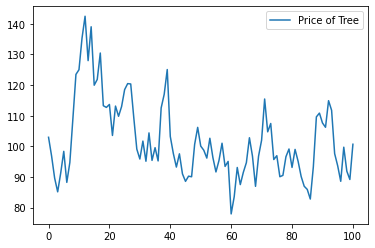

In [6]:
### Fig 7.12.1 from p.147 of HS2013
plt.plot(econ1.Pay_Price, label='Price of Tree')
plt.legend()
plt.show()

The next plot displays the realized gross rate of return on this "Lucas
tree" as well as on a risk-free one-period bond:

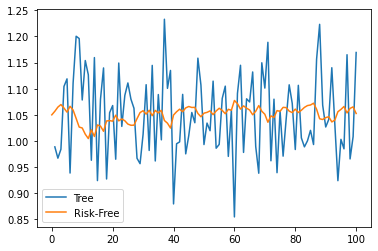

In [7]:
### Left panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(econ1.Pay_Gross, label='Tree')
plt.plot(econ1.R1_Gross, label='Risk-Free')
plt.legend()
plt.show()

In [8]:
np.corrcoef(econ1.Pay_Gross[1:, 0], econ1.R1_Gross[1:, 0])

array([[ 1.        , -0.43591316],
       [-0.43591316,  1.        ]])

Above we have also calculated the correlation coefficient between these
two returns.

To give an idea of how the term structure of interest rates moves in
this economy, the next plot displays the *net* rates of return on
one-period and five-period risk-free bonds:

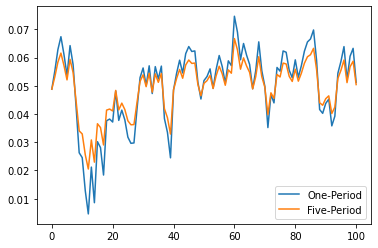

In [9]:
### Right panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(econ1.R1_Net, label='One-Period')
plt.plot(econ1.R5_Net, label='Five-Period')
plt.legend()
plt.show()

From the above plot, we can see the tendency of the term structure to
slope up when rates are low and to slope down when rates are high.

Comparing it to the previous plot of the price of the "Lucas tree", we
can also see that net rates of return are low when the price of the tree
is high, and vice versa.

We now plot the realized gross rate of return on a "Lucas tree" as well
as on a risk-free one-period bond when the autoregressive parameter for
the endowment process is reduced to 0.4:

In [10]:
a22_2 = np.array([[1,   0,   0],
                  [0, 0.4,   0],
                  [0,   0, 0.5]])
info2 = (a22_2, c2, ub, ud)

econ2 = DLE(info2, tech1, pref1)
econ2.compute_sequence(x0, ts_length=100, Pay=np.array([econ2.Sd[0, :]]))

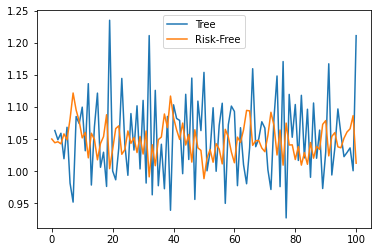

In [11]:
### Left panel of Fig 7.12.3 from p.148 of HS2013
plt.plot(econ2.Pay_Gross, label='Tree')
plt.plot(econ2.R1_Gross, label='Risk-Free')
plt.legend()
plt.show()

In [12]:
np.corrcoef(econ2.Pay_Gross[1:, 0], econ2.R1_Gross[1:, 0])

array([[ 1.        , -0.69252969],
       [-0.69252969,  1.        ]])

The correlation between these two gross rates is now more negative.

Next, we again plot the *net* rates of return on one-period and
five-period risk-free bonds:

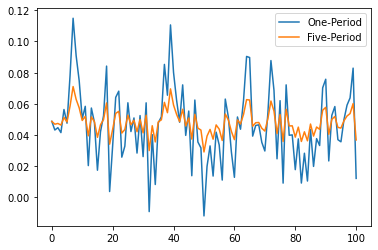

In [13]:
### Right panel of Fig 7.12.3 from p.148 of HS2013
plt.plot(econ2.R1_Net, label='One-Period')
plt.plot(econ2.R5_Net, label='Five-Period')
plt.legend()
plt.show()

We can see the tendency of the term structure to slope up when rates are
low (and down when rates are high) has been accentuated relative to the
first instance of our economy.